#### Computatuion Description
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1 - Spruce/Fir
2 - Lodgepole Pine
3 - Ponderosa Pine
4 - Cottonwood/Willow
5 - Aspen
6 - Douglas-fir
7 - Krummholz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',200)

In [2]:
df_train = pd.read_csv('train.csv')

## EDA
### Data Exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.

In [3]:
train = df_train.copy()

In [4]:
df_train.shape

(15120, 56)

In [5]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,15120.0,7560.500000,4364.912370,1.0,3780.75,7560.5,11340.25,15120.0
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.00,2752.0,3104.00,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.00,126.0,261.00,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.00,15.0,22.00,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.00,180.0,330.00,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.00,32.0,79.00,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.00,1316.0,2270.00,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.00,220.0,235.00,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.00,223.0,235.00,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.00,138.0,167.00,248.0


In [1]:
#Correlation matrix
plt.figure(figsize=(40,25))
sns.heatmap(df_train.corr(),annot=True)

NameError: name 'plt' is not defined

### Data Cleaning 
 Removing or correcting any inaccuracies or missing values in the dataset.

In [8]:
df_train=df_train.set_index('Id')

We merged all 'Soil Types' columns into the one Soil Type column 

In [9]:
df_train['Soil types'] = (df_train.iloc[:,14:54]==1).idxmax(1)
df_train['Soil types'] = df_train['Soil types'].str.replace('Soil_Type','ST')

In [10]:
#Instead of writing all 40 columns we deleted by selecting the column range by iloc
df_train=df_train.drop(df_train.iloc[:,14:54],axis=1)

In [11]:
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil types
Id,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,5,ST29
2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,ST29
3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,ST12
4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,ST30
5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,ST29


#### We merged all 'Wilderness Area' columns into the one Wilderness Area column 

In [12]:
df_train['Wilderness Area']=(df_train.iloc[:,10:14]==1).idxmax(1)
df_train['Wilderness Area']= df_train['Wilderness Area'].str.replace('Wilderness_Area','W')

In [13]:
df_train.sample(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type,Soil types,Wilderness Area
Id,,,,,,,,,,,,,,,,,
10037,3354,121,28,95,46,2016,254,205,58,808,0,0,1,0,7,ST40,W3
12518,2284,112,11,524,-9,1364,239,228,119,895,0,0,0,1,4,ST2,W4
13684,2633,135,7,182,-6,990,231,237,138,700,0,0,1,0,5,ST2,W3
9742,3396,95,17,446,239,1471,245,213,92,828,0,0,1,0,7,ST39,W3
11261,2645,79,8,446,51,1027,231,226,128,932,0,0,1,0,3,ST11,W3


In [14]:
df_train.drop(df_train.iloc[:,10:14],axis=1,inplace=True)

In [15]:
df_train.sample(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil types,Wilderness Area
Id,,,,,,,,,,,,,
7550,2544,48,13,180,34,1383,224,212,120,1383,6,ST4,W3
8441,2862,141,23,875,83,2349,246,227,96,1561,5,ST13,W3
2233,1906,356,20,150,55,120,184,201,151,726,6,ST2,W4
3746,2269,325,25,42,13,902,151,204,189,525,3,ST10,W4
6348,2495,359,15,492,76,430,197,212,151,940,6,ST6,W4


In [16]:
df_train.shape

(15120, 13)

### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers.

In [17]:
#A pairplot, also known as scatterplot matrix, is a type of plot that shows scatter plots between all pairs of variables in a DataFrame
#This can be useful for exploring the relationships between variables and identifying patterns in the data.
sns.pairplot(df_train)

<AxesSubplot:xlabel='Cover_Type', ylabel='count'>

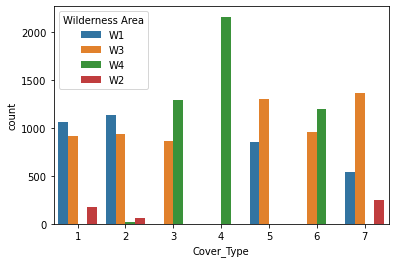

In [18]:
#To understand the distribution of observations in the data and to identify patterns or trends in the data.
sns.countplot(data=df_train,x=df_train['Cover_Type'],hue=df_train['Wilderness Area'])

The graph above shows that covertypes for each wildness area.

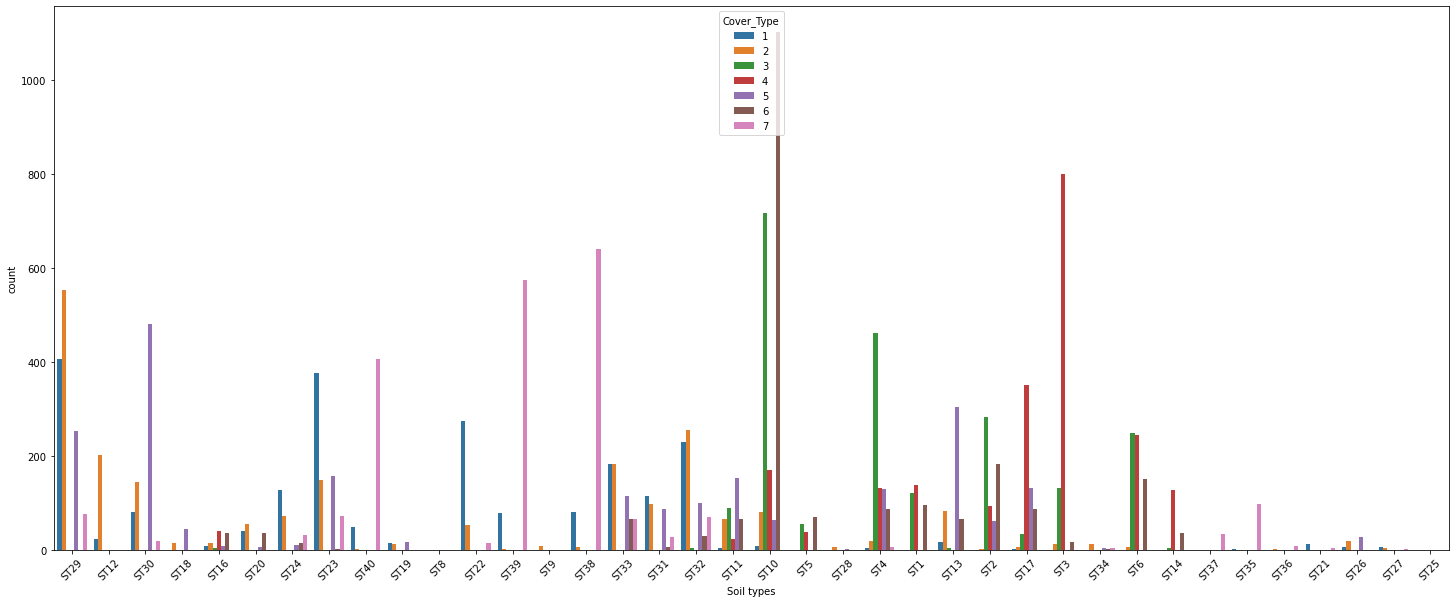

In [19]:
plt.figure(figsize=(25,10))
sns.countplot(data=df_train,x=df_train['Soil types'],hue=df_train['Cover_Type'])
plt.xticks(rotation=45);

### Data preprocessing
Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [21]:
x=train.drop(columns=['Id', 'Cover_Type'])
y=train.Cover_Type
y=y-1

In [22]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error




In [23]:
def algo_test(x,y): 
    lgbc=LGBMClassifier()
    xgbc=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[lgbc, xgbc,g,b,k,svc,d,log,gbc,rf,ab]
    algos_name=['LGBMClassifier','XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','RandomForest','AdaBoost']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=101)

    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,predict))
        precision.append(precision_score(y_test,predict,average='micro'))
        recall.append(recall_score(y_test,predict,average='micro'))
        f1.append(f1_score(y_test,predict,average='micro'))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('AccuracyScore',ascending=False)

In [24]:
#algo_test(x,y)

### Data modeling
Creating models to make predictions or classify the data.

In [25]:
rd=RandomForestClassifier()

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y ,random_state=40)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)*100


86.32275132275133

In [32]:
pred = model.predict(test.drop(columns='Id'))


In [33]:
set(pred) # xgboost icin 1 cikarmistik
pred = pred+1
set(pred) # xgboost icin 1 cikarmistik


{1, 2, 3, 4, 5, 6, 7}

In [34]:
submission = pd.read_csv('sampleSubmission.csv')
submission['Cover_Type'] = pred
submission.head()

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,2
3,15124,1
4,15125,2


In [35]:
submission.to_csv('submission.csv', index=False)

Result: We used the RandomForestClassifier for testing our model. Our accuracy is 86.32